In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = pd.read_excel('data.xlsx', header=0)

#### Дискретное распределение

In [20]:
discrete_data = data['X1'].copy()

df = discrete_data.value_counts().reset_index().sort_values(by='X1')
df.reset_index(drop=True, inplace=True)

df['rel_freq'] = df['count'] / len(data)
df['empirical_function'] = df['rel_freq'].cumsum()

display(df)

,X1,count,rel_freq,empirical_function
0,1,5,0.10,0.10
1,2,11,0.22,0.32
2,3,5,0.10,0.42
3,4,10,0.20,0.62
4,5,10,0.20,0.82
5,6,5,0.10,0.92
6,7,2,0.04,0.96
7,8,2,0.04,1.00


'Среднее'

3.84

'Дисперсия'

3.4544

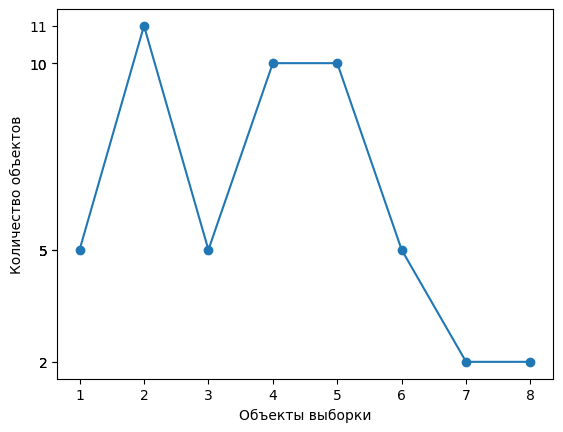

In [22]:
plt.xlabel('Объекты выборки')
plt.xticks(df['X1'])

plt.ylabel('Количество объектов')
plt.yticks(df['count'])

plt.plot(df['X1'],df['count'], marker='o')

display('Среднее', np.mean(discrete_data))
display('Дисперсия', np.var(discrete_data))
plt.show()

#### Непрерывное распределение

In [26]:
continuous_data = data['X2'].copy()


ivaln = int(1 + 3.321 * np.log10(len(continuous_data)))
ival_step = (max(continuous_data) - min(continuous_data)) / ivaln

counts, bins = np.histogram(continuous_data, bins=ivaln)

(array([ 1.,  9., 17., 20.,  2.,  1.]),
 array([-2.26855898,  1.47887448,  5.22630794,  8.97374141, 12.72117487,
        16.46860833, 20.2160418 ]),
 <BarContainer object of 6 artists>)

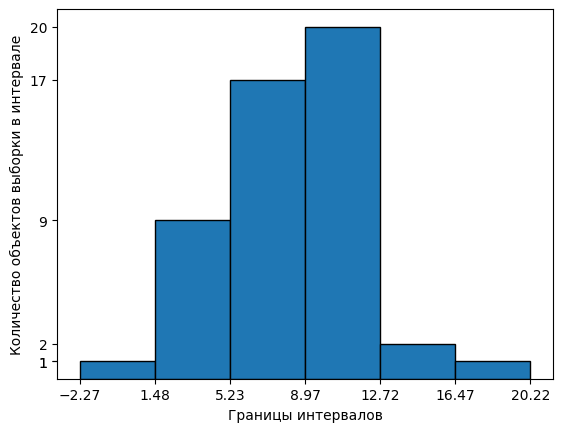

In [27]:
plt.ylabel('Количество объектов выборки в интервале')
plt.yticks(counts)

plt.xlabel('Границы интервалов')
plt.xticks(bins)

plt.hist(bins[:-1], bins, weights=counts, ec='black')